In [2]:
#Importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#cargamos archivo
Data = pd.read_csv('./Cardiaca.csv')

In [4]:
# Mostramos informacion de archivo
Data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [5]:
#Descripcinn de los datos
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
#realizando un analisis de los datos y el desconocimiento de temas hospitalarios realice la investigacion de algunos valores como presion
#arterial y revisando la informacion dada en la web no he encontrado datos atipicos en el archivo ya que muchos se basan en 0 y 1 para indicar el valor
#no se encuencuentran valores nulos a continuacion hago la validacion para verificar valores nulos

In [7]:
Data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
#Validar tipos de datos y cantidad de registros
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
#Cantidad de personas con problemas cardiacos 0 = sin enfermedad, 1 = enfermedad
Data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [10]:
X = Data.drop('condition',axis=1) # Se generan datos sin el la informacion de condition
Y = Data['condition'] # Se generan los datos solo con la informacion del campo condition

#Separamos el dataset en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

In [11]:
#Imprimos lo generado para verificar en train
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
261   51    1   3       140   261    0        2      186      1      0.0   
121   51    0   2       140   308    0        2      142      0      1.5   
12    59    1   0       134   204    0        0      162      0      0.8   
141   44    1   2       120   226    0        0      169      0      0.0   
29    62    1   1       128   208    1        2      140      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
174   64    1   3       120   246    0        2       96      1      2.2   
294   35    1   3       120   198    0        0      130      1      1.6   
135   46    0   2       142   177    0        2      160      1      1.4   
252   53    1   3       123   282    0        0       95      1      2.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
261      0   0     0  
121      0   1     0  
12       0   2    

In [12]:
#Imprimos lo generado para verificar en test
print (Y_train)

261    0
121    0
12     1
141    0
29     0
      ..
174    1
294    1
135    0
252    1
246    1
Name: condition, Length: 237, dtype: int64


In [13]:
#regresion logística 
regresion = LogisticRegression(solver = "liblinear") 
regresion.fit (X_train , Y_train)   
# Crea el modelo de prediccion
Prediccion = regresion.predict(X_test) 

In [14]:
#imprimos test para validar contra la informacion generada en la prediccion
print (Y_test)

129    1
7      1
162    1
183    1
264    1
263    1
279    1
35     1
280    1
224    1
272    0
177    0
111    0
97     0
255    1
51     0
211    1
117    0
151    0
249    0
163    1
94     0
77     0
47     0
55     0
149    0
33     1
202    1
218    0
39     0
230    1
116    0
271    0
42     0
244    1
96     1
30     0
108    0
131    0
201    1
110    0
270    1
216    1
285    0
198    1
76     1
89     0
63     0
168    1
14     0
235    1
105    0
217    1
185    1
46     0
160    1
148    0
137    0
43     0
276    0
Name: condition, dtype: int64


In [15]:
print (Prediccion)

[1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


In [16]:
# reporte del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



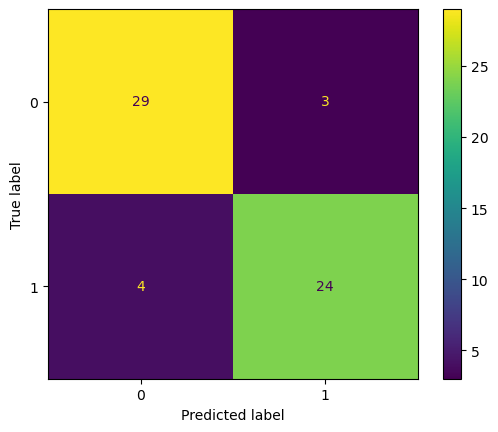

In [17]:
#Matrix de Confusinn del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()